#### HMA glacier elevatin change analysis by using data by Huggonet et al.(2021).
!!Note: the glacier outline data used by Huggonet et al.(2021) is RGI6.0


In [1]:
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
from utils.scatter_plot import scatter_plot


In [2]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_dhdt_05tiles = 'data/glaciers/gla-elev-change-hugonnet/tile_time_series/dh_world_tiles_0.5deg_rates.csv'
path_dhdt_1tiles = 'data/glaciers/gla-elev-change-hugonnet/tile_time_series/dh_world_tiles_1deg_rates.csv'


In [3]:
### read in data   
hma_gtng = gpd.read_file(path_hma_gtng)
hma_gtng = gpd.read_file(path_hma_gtng).to_crs(ccrs.PlateCarree().proj4_init)
dhdt_05tiles = pd.read_csv(path_dhdt_05tiles)
dhdt_1tiles = pd.read_csv(path_dhdt_1tiles)
# hma_gtng.head()
dhdt_05tiles.head()


,tile_lonmin,tile_latmin,tile_size,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt
0,-119.0,36.0,0.5,2000-01-01_2001-01-01,230000,0.510,4.559,117233.0,1048469.0,0.0001,0.0009
1,-119.0,36.0,0.5,2001-01-01_2002-01-01,230000,0.455,4.401,104614.0,1012126.0,0.0001,0.0009
2,-119.0,36.0,0.5,2002-01-01_2003-01-01,230000,0.419,4.298,96455.0,988467.0,0.0001,0.0008
3,-119.0,36.0,0.5,2003-01-01_2004-01-01,230000,0.422,4.177,97128.0,960611.0,0.0001,0.0008
4,-119.0,36.0,0.5,2004-01-01_2005-01-01,230000,0.409,4.102,94108.0,943430.0,0.0001,0.0008


In [4]:
### Select period of 2000-2019 and hma region
min_x, min_y, max_x, max_y = hma_gtng.total_bounds
dhdt_05tiles = dhdt_05tiles[(dhdt_05tiles['period']=='2000-01-01_2020-01-01') & 
                            (dhdt_05tiles['tile_lonmin'] >= min_x) & (dhdt_05tiles['tile_lonmin'] <= max_x) &
                            (dhdt_05tiles['tile_latmin'] >= min_y) & (dhdt_05tiles['tile_latmin'] <= max_y)]  
dhdt_1tiles = dhdt_1tiles[(dhdt_1tiles['period']=='2000-01-01_2020-01-01') & 
                            (dhdt_1tiles['tile_lonmin'] >= min_x) & (dhdt_1tiles['tile_lonmin'] <= max_x) &
                            (dhdt_1tiles['tile_latmin'] >= min_y) & (dhdt_1tiles['tile_latmin'] <= max_y)]  
print(dhdt_05tiles.shape)  
print(dhdt_1tiles.shape)  
dhdt_05tiles.head(5)  


(864, 11)
(319, 11)


,tile_lonmin,tile_latmin,tile_size,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt
132257,88.5,27.0,0.5,2000-01-01_2020-01-01,264000,-1.174,0.260,-309933.0,68463.0,-0.0003,0.0001
132299,100.0,27.0,0.5,2000-01-01_2020-01-01,5985000,-0.929,0.164,-5560062.0,981981.0,-0.0047,0.0009
132341,86.0,27.5,0.5,2000-01-01_2020-01-01,112610000,-0.573,0.090,-64549997.0,10160148.0,-0.0549,0.0095
132383,86.5,27.5,0.5,2000-01-01_2020-01-01,356397000,-0.516,0.073,-183930653.0,26008554.0,-0.1563,0.0247
132425,87.0,27.5,0.5,2000-01-01_2020-01-01,256167000,-0.386,0.085,-98974705.0,21818948.0,-0.0841,0.0195


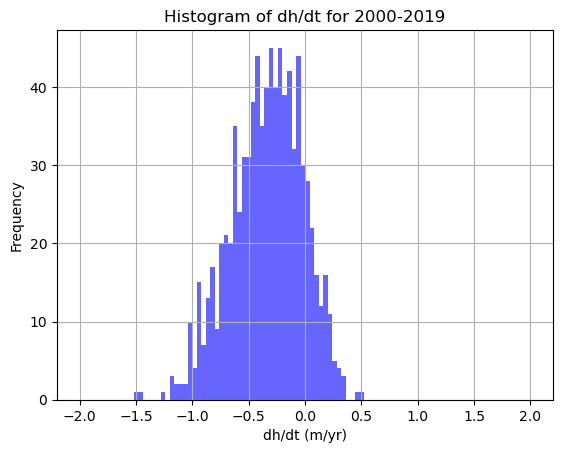

In [5]:
### plot histogram of dh/dt
dhdt_05tiles['dhdt'].hist(bins=100, edgecolor='none', \
                          range=[-2, 2], facecolor='blue', alpha=0.6)
plt.ylabel('Frequency')
plt.xlabel('dh/dt (m/yr)')
plt.title('Histogram of dh/dt for 2000-2019')
plt.show()


Text(0.5, 1.0, 'HMA glacier elevation change in 0.5x0.5 geographical tiles (2000-2019)')

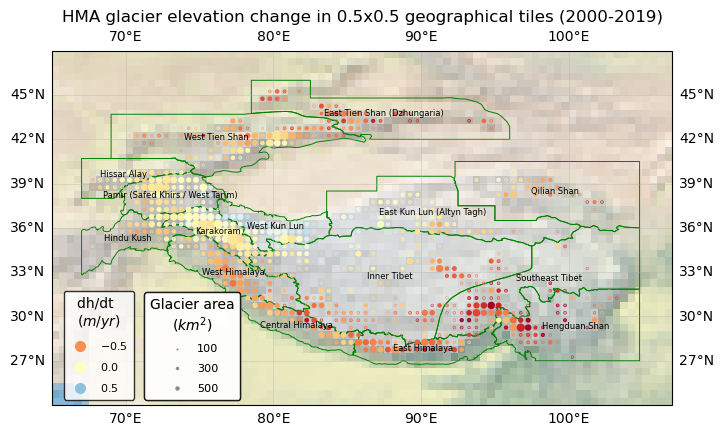

In [18]:
geo_centers = hma_gtng.geometry.centroid
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_gtng['full_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', transform=ccrs.PlateCarree())
ax = scatter_plot(x=dhdt_05tiles['tile_lonmin'].values+0.25, y=dhdt_05tiles['tile_latmin'].values+0.25, 
                          size=dhdt_05tiles['area'].values/1_000_000,  
                          color=dhdt_05tiles['dhdt'].values, 
                          ax=ax, 
                          labels_size = [100, 300, 500], 
                          labels_color = [-0.5, 0, 0.5], 
                          scale_size = 1/50,
                          )

ax.set_title('HMA glacier elevation change in 0.5x0.5 geographical tiles (2000-2019)')


Text(0.5, 1.0, 'HMA glacier elevation change in 1x1 geographical tiles (2000-2019)')

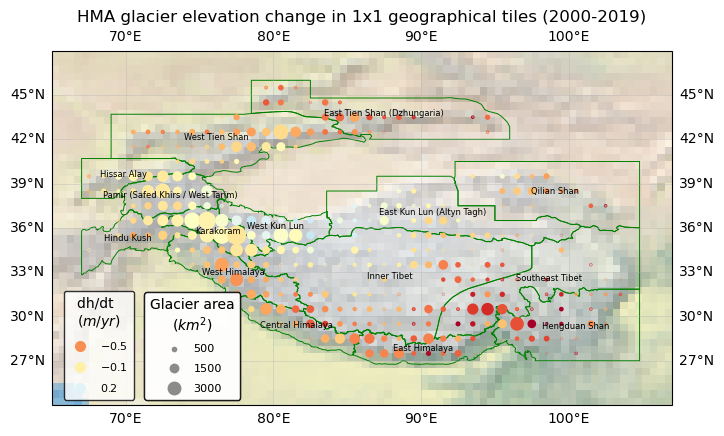

In [17]:
geo_centers = hma_gtng.geometry.centroid
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_gtng['full_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', transform=ccrs.PlateCarree())
ax = scatter_plot(x = dhdt_1tiles['tile_lonmin'].values+0.5, y = dhdt_1tiles['tile_latmin'].values+0.5,
                          size=dhdt_1tiles['area'].values/1_000_000,  
                          color=dhdt_1tiles['dhdt'].values, 
                          ax=ax, 
                          labels_size = [500,1500,3000], 
                          labels_color = [-0.5, -0.1, 0.2], 
                          scale_size = 1/30, cmap="RdYlBu")
ax.set_title('HMA glacier elevation change in 1x1 geographical tiles (2000-2019)')

